# LeNet-5

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Kaggle 데이터 불러오기

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## csv로 불러온 DataFrame을 ndarray로 변환, 데이터 정규화

In [6]:
train_images = train.drop('label', axis=1).values
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_images.shape

(42000, 28, 28, 1)

- `to_categorical`을 써서 one-hot encoding을 해 두지 말고,
- 그냥 레이블로 둔 뒤에 모델 compile 과정에서
- `categorical_crossentopy` 대신 `sparse_categorical_crossentropy`를 사용해도 된다.
- 따라서 이번에는 원 핫 인코딩을 하지 말아 보자.

In [7]:
# train_labels = to_categorical(train['label'])
train_labels = train['label']
train_labels.shape

(42000,)

In [8]:
test_images = test.values
test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_images.shape

(28000, 28, 28, 1)

## Model 구성 및 컴파일, 훈련
- LeNet-5를 구현할 것이다.

In [9]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

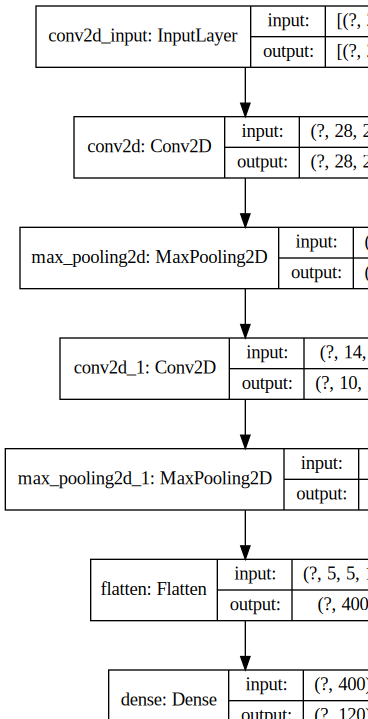

In [11]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=16)

Epoch 1/5
2625/2625 [==============================] - 12s 5ms/step - loss: 0.3849 - accuracy: 0.8800

## 훈련된 Model을 이용해서 예측

In [13]:
test_labels = model.predict(test_images)
test_labels.shape

(28000, 10)

In [14]:
pred = test_labels.argmax(axis=1)
pred.shape

(28000,)

## Submission!
```
Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8
(27997 more lines)
```

In [15]:
submission = pd.DataFrame({
    "ImageId": range(1, 28001),
    "Label": pred
})
submission.to_csv('../output/LeNet-5_submission.csv', index=False)